In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_moons(n_samples=4000, noise=0.1)

In [4]:
X.shape, y.shape

((4000, 2), (4000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
X_train.shape, X_test.shape

((2680, 2), (1320, 2))

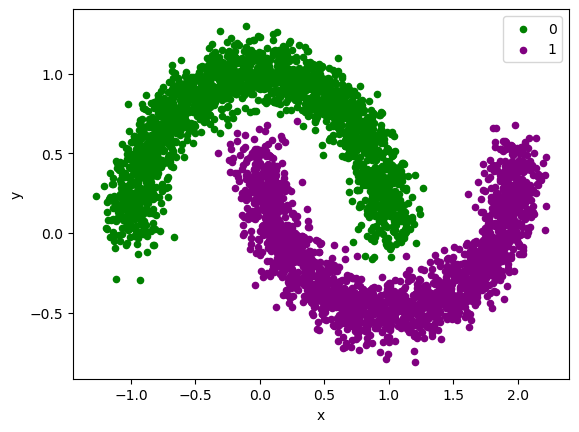

In [8]:
# Scatter, plot dots colored by class value

dots = pd.DataFrame(dict(x= X[:,0], y= X[:,1], label= y))
colors = {0 : "green", 1 : "purple"}
fig, ax = plt.subplots()
grouped = dots.groupby("label")
for key , group in grouped:
    group.plot(ax = ax, kind= "scatter", x ="x", y = "y", label = key, color = colors[key])
plt.show()

In [7]:
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles

,X0,X1,label
0,-0.915439,0.446412,0
1,1.484409,-0.350745,1
2,1.289823,-0.551538,1
3,-0.049701,0.185928,1
4,-0.987931,0.102976,0
...,...,...,...
3995,-0.983405,0.249898,0
3996,0.310794,-0.053460,1
3997,-0.725199,0.703271,0
3998,0.930432,0.639544,0


In [9]:
def plot_decision_bound(model, X, y):
    """Plots the decision boundary created by a model predicting on X"""
    # Define the axis boundaries of the plot and create a meshgrid
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class classification
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
    
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # PLot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

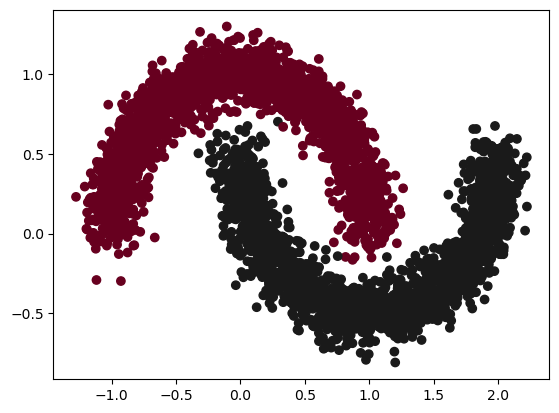

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdGy)

In [15]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid"),
    
])

model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs = 20, verbose =2)

Epoch 1/20
84/84 - 2s - loss: 0.8120 - accuracy: 0.2123 - 2s/epoch - 29ms/step
Epoch 2/20
84/84 - 0s - loss: 0.7255 - accuracy: 0.4373 - 326ms/epoch - 4ms/step
Epoch 3/20
84/84 - 0s - loss: 0.6716 - accuracy: 0.6157 - 329ms/epoch - 4ms/step
Epoch 4/20
84/84 - 0s - loss: 0.6228 - accuracy: 0.7507 - 302ms/epoch - 4ms/step
Epoch 5/20
84/84 - 0s - loss: 0.5596 - accuracy: 0.8004 - 255ms/epoch - 3ms/step
Epoch 6/20
84/84 - 0s - loss: 0.4986 - accuracy: 0.8209 - 254ms/epoch - 3ms/step
Epoch 7/20
84/84 - 0s - loss: 0.4565 - accuracy: 0.8287 - 255ms/epoch - 3ms/step
Epoch 8/20
84/84 - 0s - loss: 0.4281 - accuracy: 0.8496 - 262ms/epoch - 3ms/step
Epoch 9/20
84/84 - 0s - loss: 0.4068 - accuracy: 0.8687 - 292ms/epoch - 3ms/step
Epoch 10/20
84/84 - 0s - loss: 0.3896 - accuracy: 0.8746 - 288ms/epoch - 3ms/step
Epoch 11/20
84/84 - 0s - loss: 0.3755 - accuracy: 0.8795 - 294ms/epoch - 3ms/step
Epoch 12/20
84/84 - 0s - loss: 0.3638 - accuracy: 0.8840 - 300ms/epoch - 4ms/step
Epoch 13/20
84/84 - 0s - lo

In [16]:
model.evaluate(X_test,y_test)

42/42 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8750


[0.3186202645301819, 0.875]

313/313 [==============================] - 1s 2ms/step
doing binary classification


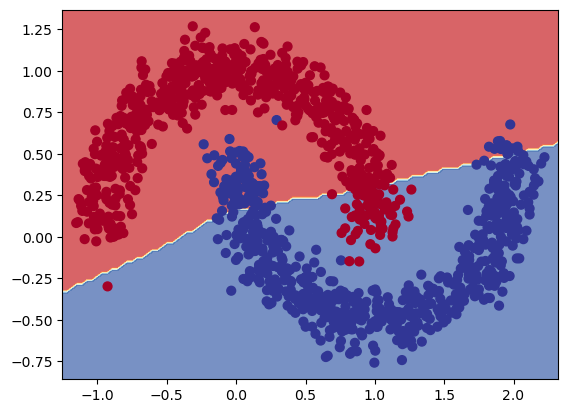

In [17]:
plot_decision_bound(model=model, X= X_test,y= y_test)

In [20]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid"),
    
])

model1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

lr_sched = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history1 = model.fit(X_train, y_train, epochs = 30, callbacks = [lr_sched], verbose =2)

Epoch 1/30
84/84 - 0s - loss: 0.2991 - accuracy: 0.8970 - lr: 1.0000e-04 - 345ms/epoch - 4ms/step
Epoch 2/30
84/84 - 0s - loss: 0.2986 - accuracy: 0.8966 - lr: 1.1220e-04 - 277ms/epoch - 3ms/step
Epoch 3/30
84/84 - 0s - loss: 0.2980 - accuracy: 0.8978 - lr: 1.2589e-04 - 276ms/epoch - 3ms/step
Epoch 4/30
84/84 - 0s - loss: 0.2973 - accuracy: 0.8978 - lr: 1.4125e-04 - 280ms/epoch - 3ms/step
Epoch 5/30
84/84 - 0s - loss: 0.2966 - accuracy: 0.8978 - lr: 1.5849e-04 - 257ms/epoch - 3ms/step
Epoch 6/30
84/84 - 0s - loss: 0.2957 - accuracy: 0.8978 - lr: 1.7783e-04 - 274ms/epoch - 3ms/step
Epoch 7/30
84/84 - 0s - loss: 0.2948 - accuracy: 0.8978 - lr: 1.9953e-04 - 259ms/epoch - 3ms/step
Epoch 8/30
84/84 - 0s - loss: 0.2938 - accuracy: 0.8978 - lr: 2.2387e-04 - 258ms/epoch - 3ms/step
Epoch 9/30
84/84 - 0s - loss: 0.2927 - accuracy: 0.8978 - lr: 2.5119e-04 - 272ms/epoch - 3ms/step
Epoch 10/30
84/84 - 0s - loss: 0.2914 - accuracy: 0.8978 - lr: 2.8184e-04 - 260ms/epoch - 3ms/step
Epoch 11/30
84/84 -

<AxesSubplot: xlabel='epochs'>

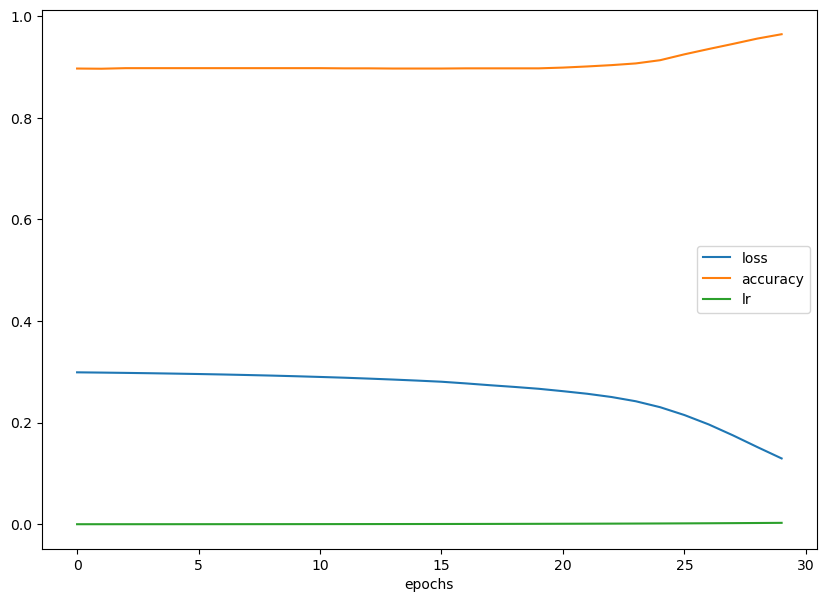

In [21]:
pd.DataFrame(history1.history).plot(figsize=(10,7), xlabel="epochs")

In [25]:
lrs = 1e-4 * (10 **(tf.range(30)/20))
lrs

<tf.Tensor: shape=(30,), dtype=float64, numpy=
array([0.0001    , 0.0001122 , 0.00012589, 0.00014125, 0.00015849,
       0.00017783, 0.00019953, 0.00022387, 0.00025119, 0.00028184,
       0.00031623, 0.00035481, 0.00039811, 0.00044668, 0.00050119,
       0.00056234, 0.00063096, 0.00070795, 0.00079433, 0.00089125,
       0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838])>

Text(0.5, 1.0, 'Learning rate vs Loss')

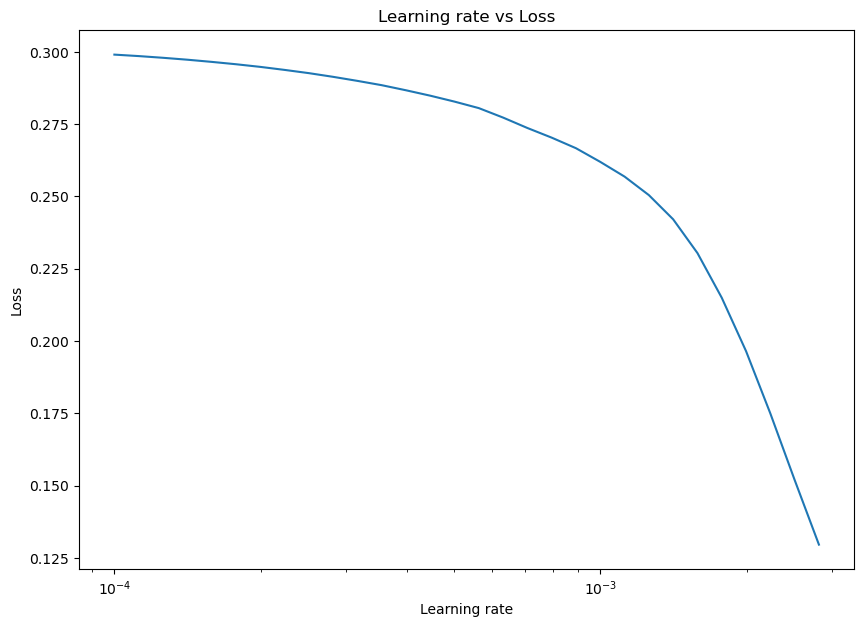

In [26]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history1.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [27]:
10**-2

0.01

In [28]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid"),
    
])

model2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(0.01),
              metrics = ["accuracy"])


history2 = model2.fit(X_train, y_train, epochs = 30, verbose =2)

Epoch 1/30
84/84 - 1s - loss: 0.5903 - accuracy: 0.6194 - 715ms/epoch - 9ms/step
Epoch 2/30
84/84 - 0s - loss: 0.2995 - accuracy: 0.8668 - 278ms/epoch - 3ms/step
Epoch 3/30
84/84 - 0s - loss: 0.2267 - accuracy: 0.9026 - 260ms/epoch - 3ms/step
Epoch 4/30
84/84 - 0s - loss: 0.1789 - accuracy: 0.9347 - 262ms/epoch - 3ms/step
Epoch 5/30
84/84 - 0s - loss: 0.0958 - accuracy: 0.9735 - 242ms/epoch - 3ms/step
Epoch 6/30
84/84 - 0s - loss: 0.0349 - accuracy: 0.9929 - 269ms/epoch - 3ms/step
Epoch 7/30
84/84 - 0s - loss: 0.0200 - accuracy: 0.9970 - 269ms/epoch - 3ms/step
Epoch 8/30
84/84 - 0s - loss: 0.0142 - accuracy: 0.9978 - 262ms/epoch - 3ms/step
Epoch 9/30
84/84 - 0s - loss: 0.0110 - accuracy: 0.9978 - 258ms/epoch - 3ms/step
Epoch 10/30
84/84 - 0s - loss: 0.0092 - accuracy: 0.9985 - 272ms/epoch - 3ms/step
Epoch 11/30
84/84 - 0s - loss: 0.0080 - accuracy: 0.9981 - 283ms/epoch - 3ms/step
Epoch 12/30
84/84 - 0s - loss: 0.0078 - accuracy: 0.9978 - 286ms/epoch - 3ms/step
Epoch 13/30
84/84 - 0s - 

In [29]:
model2.evaluate(X_test, y_test)

42/42 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9985


[0.004485733807086945, 0.9984848499298096]

313/313 [==============================] - 1s 2ms/step
doing binary classification


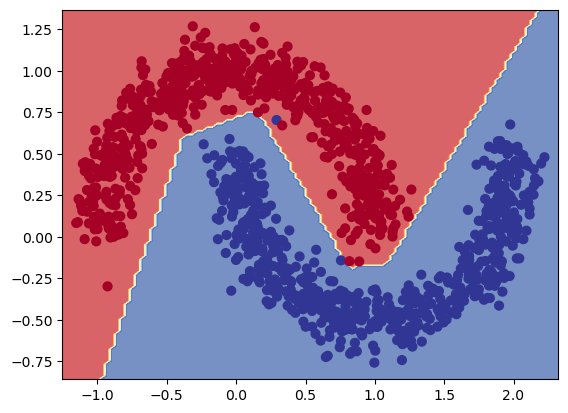

In [30]:
plot_decision_bound(model2, X_test, y_test)